# Análises dos dados obtidos

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import FeatureGroup, Icon
import ast

In [75]:
df_noticias = pd.read_csv('data/df_all_news.csv')
df_tweets = pd.read_csv('data/tweets.csv')

In [76]:
df_noticias.head()

,title,subtitle,content,published_date,link,address_types,coordinates,site,search_term,address
0,Centro-oeste paulista registrou mais de 8 mil ...,"Marília, Bauru, Lençóis Paulista, Assis e Botu...","O centro-oeste paulista registrou, em 2024, ma...",24/04/2025,https://g1.globo.com/sp/bauru-marilia/noticia/...,[],[],g1,acidente,NaN
1,Defesa Civil promove oficina para preparar pro...,Capacitação faz parte da Operação São Paulo Se...,A Defesa Civil do Estado de São Paulo realiza ...,23/04/2025,https://g1.globo.com/sp/bauru-marilia/noticia/...,['Rua'],"[(-22.3145563, -49.07876599999999)]",g1,operac,Vale do Igapó
2,Justiça arquiva inquérito que investigava prof...,Manifestações referentes à conduta do ex-docen...,A Justiça arquivou o inquérito que investigava...,23/04/2025,https://g1.globo.com/sp/bauru-marilia/noticia/...,[],[],g1,suspeit,NaN
3,Visita do papa Francisco ao Brasil em 2013 ins...,"Padre Murilo Bernardes, de Bauru (SP), encontr...",Erro ao recuperar o conteúdo,22/04/2025,https://g1.globo.com/sp/bauru-marilia/noticia/...,[],[],g1,morre,NaN
4,Igrejas realizam missas e celebrações especiai...,Pontífice morreu aos 88 anos nesta segunda-fei...,Igrejas das regiões de Bauru e Marília (SP) re...,21/04/2025,https://g1.globo.com/sp/bauru-marilia/noticia/...,"['Vila', 'Praça', 'Rua']","[(-22.3227925, -49.0730045), (-22.3155297, -49...",g1,morre,Centro


In [77]:
df_tweets.head()

,username,text,created_at,retweets,likes,search_terms
0,tadssss,toda vez q alguem vem me falar q ta triste pq ...,Fri Mar 14 17:57:39 +0000 2025,0,16,morre
1,Gabiiii,"odeio qdo acaba luz em Bauru, privatizaram ess...",Sun Mar 16 00:18:07 +0000 2025,0,1,"cpfl, energia, luz, prefeitura, árvore"
2,faby jurídico modern family,SAMU: 192\nbombeiros: 193\npolícia federal: 19...,Wed Mar 20 02:17:55 +0000 2024,7367,48391,"bombeiro, delegacia, morre, polícia, samu"
3,Governo de S. Paulo,Antes e depois da Rodovia Osni Mateus (SP 261)...,Tue Apr 15 22:23:09 +0000 2025,6,23,obra
4,Ana Bia,Qualquer poça de água é alagamento aqui em Bauru,Wed Mar 26 10:14:01 +0000 2025,0,0,"alagamento, água"


1. Estatísticas por tipo de ocorrência, fonte de dados e ano

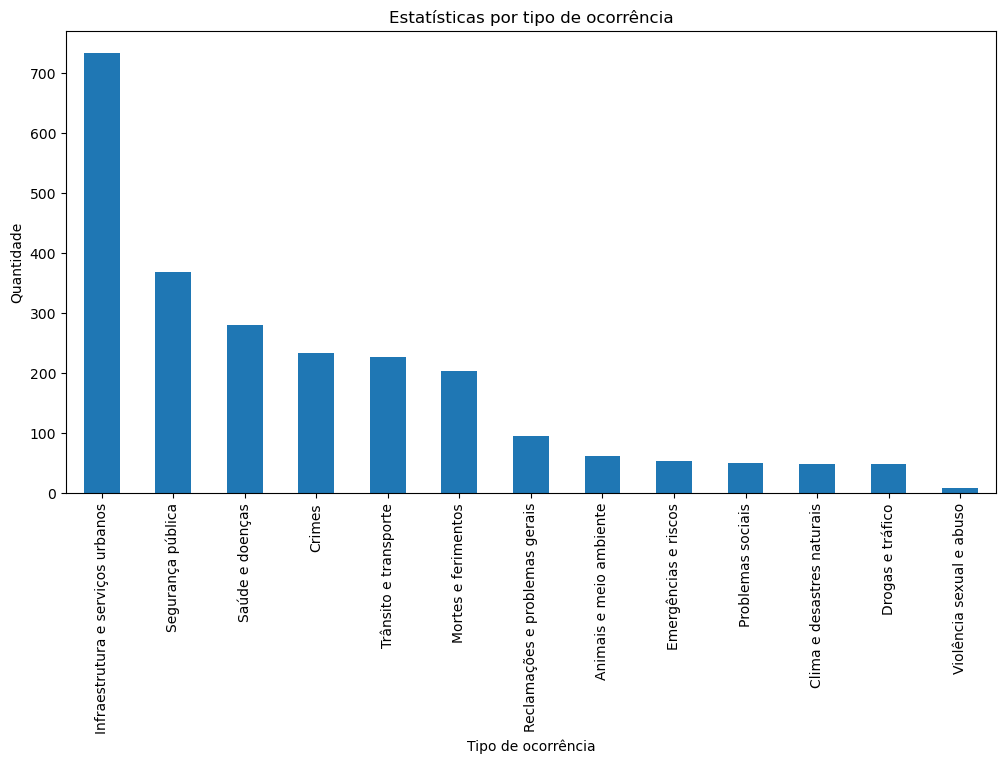

In [78]:
def classificar_ocorrencia(search_term, theme_keywords):
    search_term = str(search_term).lower()
    for theme, words in theme_keywords.items():
        for word in words:
            if word in search_term:
                return theme
    return "Outro"

theme_keywords = {
    "Animais e meio ambiente": ["rio batalha", "cobra", "animal", "animais", "maus-tratos", "maus tratos", "picad", "escorpiao", "poluido", "poluida", "mato", "poluicao", "poeira", "fumaca", "fogo", "incendio", "queima", "peconhento"],
    "Clima e desastres naturais": ["chuva", "chove", "granizo", "temporal", "tempestade", "ventania", "desastre", "erosao", "queda", "desaba", "desabou", "atol", "calor", "frio", "submers", "derrub", "cair", "caiu"],
    "Crimes": ["agredid", "tortura", "agredir", "agressao", "esfaquead", "arma", "tiro", "bala perdida", "disparo", "atentado", "facao", "facada", "violen", "crime", "sequestr", "esquartejad", "choque", "criminos", "pixacao", "vitima", "roub", "furt", "assalt", "latrocionio", "vandalismo", "vandalo", "quadrilha", "arromb", "invad", "desviado", "golp", "bandid", "celular", "faccao"],
    "Drogas e tráfico": ["entorpecente", "droga", "maconha", "cocaina", "crack", "trafic", "apreen", "contrab"],
    "Emergências e riscos": ["urgen", "risco", "alerta", "emergencia", "socorr", "grave"],
    "Infraestrutura e serviços urbanos": ["interr", "vazamento", "prefeit", "abastecimento", "rodizio", "cratera", "enchente", "enxurrada", "alaga", "luz", "buraco", "esburacad", "calcada", "semaforo", "poste", "arvore", "iluminacao", "energia", "agua", "esgoto", "bueiro", "asfalto", "paviment", "obra", "manutencao", "reparo", "saneamento", "entulho", "lixo", "coleta seletiva", "reservatorio", "adutora", "poco", "bomba", "racionamento", "eletric", "baldio", "dae", "cpfl", "companhia paulista de forca e luz", "interdi", "captacao", "quebr"],
    "Mortes e ferimentos": ["homicidio", "feminicídio", "assassin", "matar", "matou", "iml", "instituto medico legal", "letal", "afogou", "afoga", "morre", "mort", "obito", "ferid", "ferimento", "suicidio", "balead", "lesao", "lesoes", "carbonizad", "corpo"],
    "Problemas sociais": ["desemprego", "situacao de rua", "desabrig", "fome", "precar", "descaso", "morador", "favela", "comunidade", "moradia", "vulnera", "racis", "homofob", "transfob", "injuria"],
    "Reclamações e problemas gerais": ["justica", "acusad", "laudo", "pericia", "mandado", "ilegal", "atacad", "ataque", "atacou", "abandonad", "descarte", "irregular", "fraud", "escass", "danific", "dano", "falha", "falta de", "reclamacao", "reclamam", "pane", "barulho", "desaparec", "estrago", "aband", "descart", "prejuizo"],
    "Saúde e doenças": ["internad", "samu", "saude", "mosquito", "infestacao", "dengue", "zika", "chikungunya", "aedes aegypti", "surto", "doente", "vacina", "covid", "influenza", "sus", "hospital", "upa", "ubs", "unidade basica de saude", "unidade de pronto atendimento", "pandemia", "epidemia", "proliferacao", "criadouro"],
    "Segurança pública": ["fuga", "penitenciaria", "operac", "flagr", "prende", "policia", "bombeir", "blitz", "prisao", "mandado", "delegacia", "seguranca", "camera", "captura", "capturad", "investiga", "foragid", "cadeia", "presidiari", "detent", "pris", "detid", "abordagem", "denunc", "preso", "presa", "suspeit", "motim"],
    "Trânsito e transporte": ["transporte", "trafego", "aviao", "piloto", "veiculo", "tomb", "emdurmb", "transito", "acidente", "atropela", "colisao", "batida", "bate", "bateu", "capot", "motorista", "motociclista", "caminhao", "carro", "moto", "onibus", "pedestre", "ciclista", "mobilidade", "congestionamento", "radar", "emdurb", "sinal", "passageir"],
    "Violência sexual e abuso": ["bater", "estupr", "assed", "importuna", "abus", "pedofil", "medida protetiva"],
}

df_noticias['search_term'] = df_noticias['search_term'].apply(lambda x: classificar_ocorrencia(x, theme_keywords))

contagem = df_noticias['search_term'].value_counts()

contagem.plot(kind='bar', figsize=(12,6))
plt.xlabel('Tipo de ocorrência')
plt.ylabel('Quantidade')
plt.title('Estatísticas por tipo de ocorrência')
plt.show()

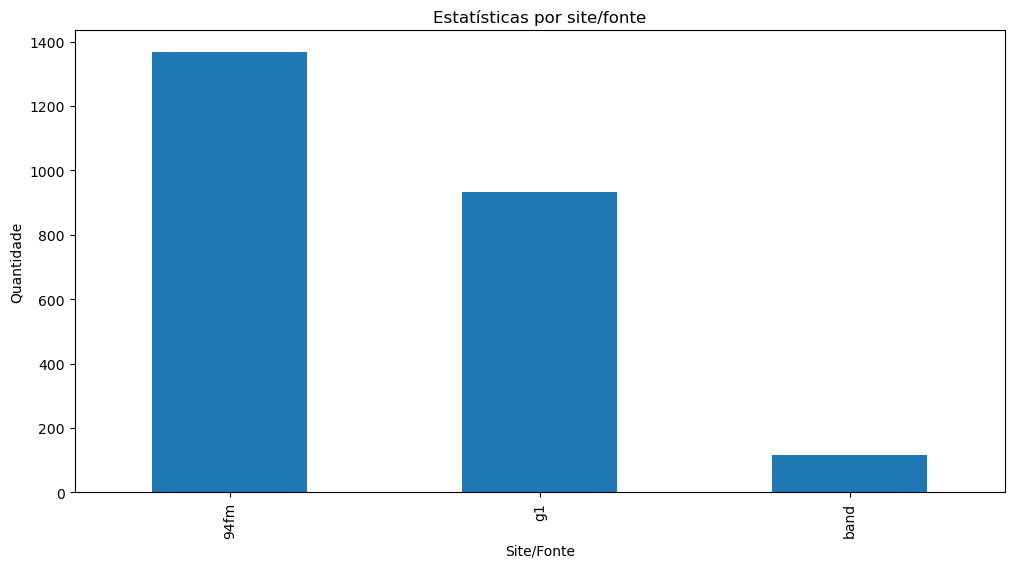

In [79]:
contagem_site = df_noticias['site'].value_counts()

contagem_site.plot(kind='bar', figsize=(12,6))
plt.xlabel('Site/Fonte')
plt.ylabel('Quantidade')
plt.title('Estatísticas por site/fonte')
plt.show()

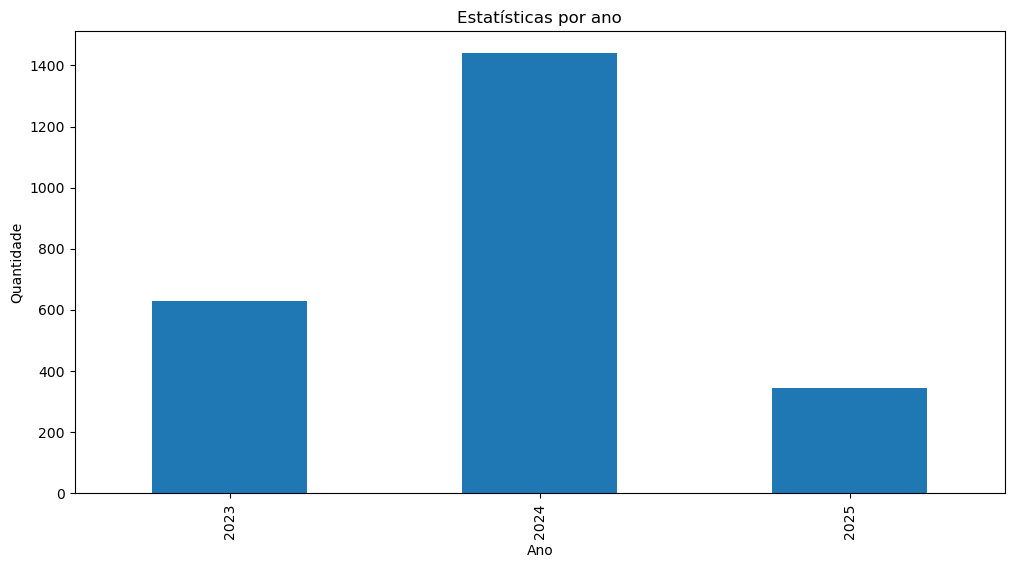

In [80]:
df_noticias['published_date'] = pd.to_datetime(df_noticias['published_date'], dayfirst=True, errors='coerce')

df_noticias['ano'] = df_noticias['published_date'].dt.year

contagem_ano = df_noticias['ano'].value_counts().sort_index()

contagem_ano.plot(kind='bar', figsize=(12,6))
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Estatísticas por ano')
plt.show()

2. Mapa com as ocorrências geolocalizadas e filtros por tipo de ocorrência, ano e região

In [81]:
df_noticias['coordinates'] = df_noticias['coordinates'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df_noticias.explode('coordinates').dropna(subset=['coordinates'])
df_exploded['latitude'] = df_exploded['coordinates'].apply(lambda c: c[0])
df_exploded['longitude'] = df_exploded['coordinates'].apply(lambda c: c[1])
df_exploded = df_exploded.dropna(subset=['latitude', 'longitude'])

# cria mapa
mapa = folium.Map(
    location=[df_exploded['latitude'].mean(), df_exploded['longitude'].mean()],
    zoom_start=13
)

# 1) Mapeamento de ícones e cores para cada categoria
categorias = sorted(df_exploded['search_term'].dropna().unique())

# paleta de ícones
icon_palette = [
    'leaf', 'bolt', 'gun', 'user-secret', 'exclamation-triangle',
    'wrench', 'skull-crossbones', 'users', 'bell',
    'hospital', 'shield', 'car','user'
]

icons_categoria = {
    cat: icon_palette[i % len(icon_palette)]
    for i, cat in enumerate(categorias)
}

# paleta de cores
color_palette = [
    'green','darkblue','darkred','purple','orange',
    'darkgreen','black','gray','lightred',
    'blue', 'cadetblue','darkpurple','beige'
]
cores_categoria = {
    cat: color_palette[i % len(color_palette)]
    for i, cat in enumerate(categorias)
}

# 2) Legenda dinâmica por categoria
legenda_html = """
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 200px; height: auto;
    background-color: white; z-index:9999; font-size:14px;
    border:2px solid grey; padding: 10px;">
  <b>Legenda:</b><br>
"""
for cat, cor in cores_categoria.items():
    legenda_html += f'<i style="color:{cor};">●</i> {cat}<br>'
legenda_html += "</div>"

mapa.get_root().html.add_child(folium.Element(legenda_html))

# 3) Cria FeatureGroups e marcadores usando a cor e ícone pela categoria
anos = sorted(df_exploded['ano'].dropna().unique())
for term in categorias:
    for ano in anos:
        grupo = FeatureGroup(name=f"{term} – {ano}", show=False)
        df_filtrado = df_exploded[
            (df_exploded['search_term'] == term) &
            (df_exploded['ano'] == ano)
            ]
        for _, row in df_filtrado.iterrows():
            cor = cores_categoria[row['search_term']]
            icone = icons_categoria[row['search_term']]
            folium.Marker(
                location=[row['latitude'], row['longitude']],
                popup=row.get('title', ''),
                tooltip=row['search_term'],
                icon=Icon(color=cor, icon=icone, prefix='fa')
            ).add_to(grupo)
        grupo.add_to(mapa)

# adiciona controle de camadas
folium.LayerControl(collapsed=False).add_to(mapa)

mapa

3. Criar um mapa de calor também com filtros

4. Identificar problemas recorrentes (tipos de ocorrência similares nos mesmos locais)

5. Analisar algumas ocorrências específicas, como exemplos do que pode ser analisado